In [1]:
import pandas as pd
import numpy as np

In [2]:
cd ..

/Users/luis/Ironhack_DAFT_ClassLab/ClassLabWeek2


In [3]:
cd ..

/Users/luis/Ironhack_DAFT_ClassLab


In [4]:
data=pd.read_csv('ClassLabWeek1/ClassLabDay3/marketing_customer_analysis.csv')

In [5]:
def standarize_col(col):
    return col.lower().replace(" ", "_")

new_cols = []
for col in data.columns.to_list():
    new_cols.append(standarize_col(col))
    
import statistics as stats

def data_trans(data):
    data.columns = new_cols
    data = data.rename({'unnamed:_0': 'unnamed'}, axis=1)
    data["state"].fillna("Unkown", inplace = True)
    data["response"].fillna("Unkown", inplace = True)
    data["vehicle_class"].fillna("Unkown", inplace = True)
    data["vehicle_size"].fillna("Unkown", inplace = True)
    data["vehicle_type"].fillna("Unkown", inplace = True)
    mean_months_since_last_claim = round(stats.mean(data["months_since_last_claim"].dropna()),2)
    mean_number_of_open_complaints = round(stats.mean(data["number_of_open_complaints"].dropna()),2)
    data["months_since_last_claim"] = data["months_since_last_claim"].replace(to_replace = np.nan, value = mean_months_since_last_claim)
    data["number_of_open_complaints"] = data["number_of_open_complaints"].replace(to_replace = np.nan, value = mean_number_of_open_complaints)
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors = "coerce")
    data['month_number'] = data['effective_to_date'].dt.strftime('%-m')
    data = data.query('month_number == "1" or month_number == "2" or month_number == "3"')
    return data 

In [6]:
df = data_trans(data)

### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [7]:
df.dtypes

unnamed                                   int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [8]:
df_numerical = df._get_numeric_data()
df_categorical = df.drop(columns=df_numerical.columns)

Numerical: 

In [9]:
list(df_numerical.columns)

['unnamed',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

Categorical: 

In [10]:
list(df_categorical.columns)

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_number']

### 2. Now we will try to check the normality of the numerical variables visually:

#### - Use seaborn library to construct distribution plots for the numerical variables

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
dfnum =df.select_dtypes(np.number)

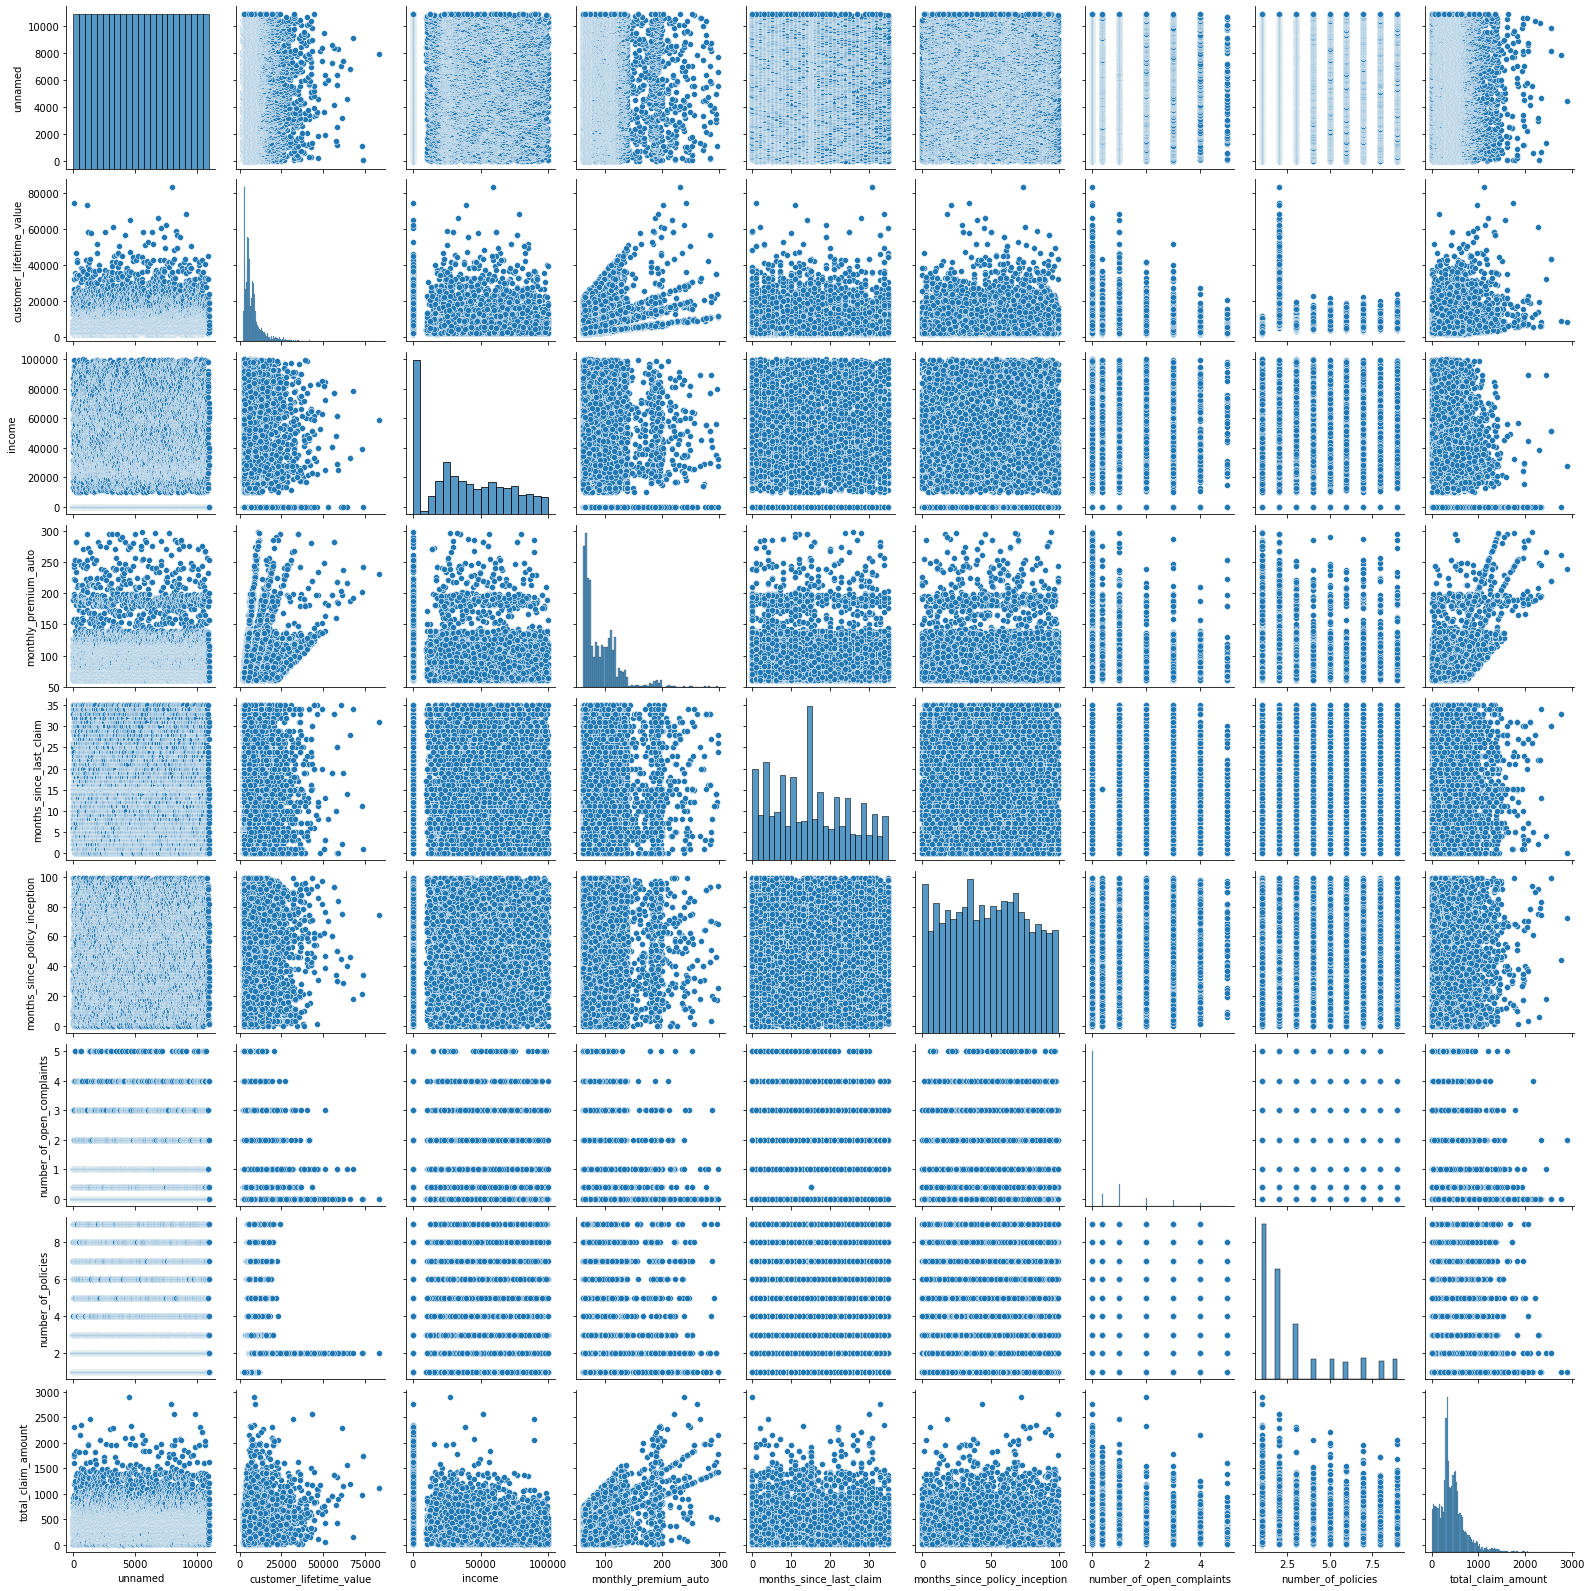

In [13]:
sns.pairplot(dfnum,)
plt.show()

#### - Use Matplotlib to construct histograms

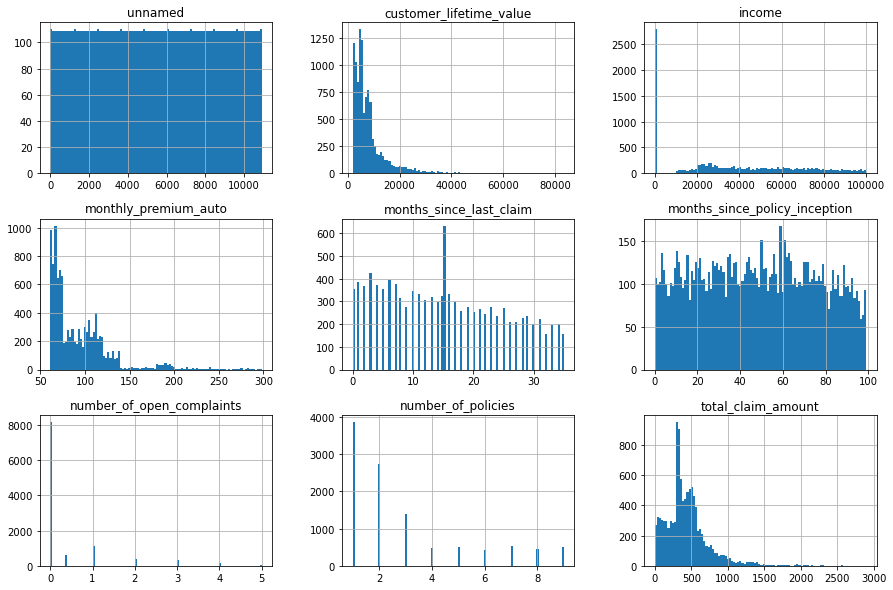

In [14]:
dfnum.hist(bins=100, figsize=(15, 10));

### - Do the distributions for different numerical variables look like a normal distribution?

customer_life_value, monthly_premium_auto and total_claim_amount are Log Normal, all of them right skewed.

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [15]:
corr_data = dfnum
correlations_matrix = corr_data.corr()
correlations_matrix

unnamed  customer_lifetime_value    income  \
unnamed                        1.000000                 0.001355  0.008910   
customer_lifetime_value        0.001355                 1.000000  0.028306   
income                         0.008910                 0.028306  1.000000   
monthly_premium_auto           0.000863                 0.403069 -0.009788   
months_since_last_claim        0.007722                 0.015683 -0.023126   
months_since_policy_inception  0.012795                 0.016960 -0.005903   
number_of_open_complaints      0.007129                -0.031493  0.006973   
number_of_policies             0.002319                 0.016024 -0.009960   
total_claim_amount            -0.000593                 0.232626 -0.354141   

                               monthly_premium_auto  months_since_last_claim  \
unnamed                                    0.000863                 0.007722   
customer_lifetime_value                    0.403069                 0.015683   
income                                    -0.009788                -0.023126   
monthly_premium_auto                       1.000000                 0.008504   
months_since_last_claim                    0.008504                 1.000000   
months_since_policy_inception              0.018953                -0.038155   
number_of_open_complaints                 -0.010066                 0.002246   
number_of_policies                        -0.020505                 0.007425   
total_claim_amount                         0.631799                 0.012728   

                               months_since_policy_inception  \
unnamed                                             0.012795   
customer_lifetime_value                             0.016960   
income                                             -0.005903   
monthly_premium_auto                                0.018953   
months_since_last_claim                            -0.038155   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.004246   
number_of_policies                                 -0.009123   
total_claim_amount                                  0.003095   

                               number_of_open_complaints  number_of_policies  \
unnamed                                         0.007129            0.002319   
customer_lifetime_value                        -0.031493            0.016024   
income                                          0.006973           -0.009960   
monthly_premium_auto                           -0.010066           -0.020505   
months_since_last_claim                         0.002246            0.007425   
months_since_policy_inception                   0.004246           -0.009123   
number_of_open_complaints                       1.000000            0.003938   
number_of_policies                              0.003938            1.000000   
total_claim_amount                             -0.011041           -0.008923   

                               total_claim_amount  
unnamed                                 -0.000593  
customer_lifetime_value                  0.232626  
income                                  -0.354141  
monthly_premium_auto                     0.631799  
months_since_last_claim                  0.012728  
months_since_policy_inception            0.003095  
number_of_open_complaints               -0.011041  
number_of_policies                      -0.008923  
total_claim_amount                       1.000000

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

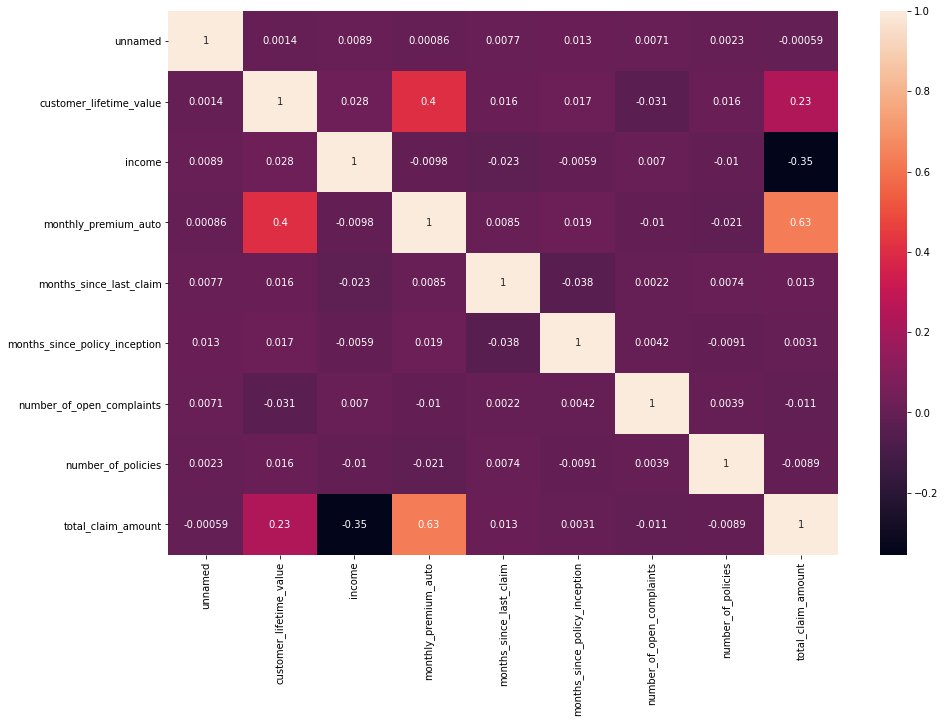

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlations_matrix,annot=True)
plt.show()

# ROUND 5

### 1. Pre-Processing Data

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
y = df["total_claim_amount"]
x = df.drop(["total_claim_amount"], axis=1)

In [19]:
x_num = x.select_dtypes(include = np.number)

In [20]:
x_num.head()

unnamed  customer_lifetime_value  income  monthly_premium_auto  \
0        0              4809.216960   48029                    61   
1        1              2228.525238       0                    64   
2        2             14947.917300   22139                   100   
3        3             22332.439460   49078                    97   
4        4              9025.067525   23675                   117   

   months_since_last_claim  months_since_policy_inception  \
0                     7.00                             52   
1                     3.00                             26   
2                    34.00                             31   
3                    10.00                              3   
4                    15.15                             31   

   number_of_open_complaints  number_of_policies  
0                       0.00                   9  
1                       0.00                   1  
2                       0.00                   2  
3                       0.00                   2  
4                       0.38                   7

In [21]:
x_num.reset_index()

index  unnamed  customer_lifetime_value  income  monthly_premium_auto  \
0          0        0              4809.216960   48029                    61   
1          1        1              2228.525238       0                    64   
2          2        2             14947.917300   22139                   100   
3          3        3             22332.439460   49078                    97   
4          4        4              9025.067525   23675                   117   
...      ...      ...                      ...     ...                   ...   
10905  10905    10905             15563.369440       0                   253   
10906  10906    10906              5259.444853   61146                    65   
10907  10907    10907             23893.304100   39837                   201   
10908  10908    10908             11971.977650   64195                   158   
10909  10909    10909              6857.519928       0                   101   

       months_since_last_claim  months_since_policy_inception  \
0                         7.00                             52   
1                         3.00                             26   
2                        34.00                             31   
3                        10.00                              3   
4                        15.15                             31   
...                        ...                            ...   
10905                    15.15                             40   
10906                     7.00                             68   
10907                    11.00                             63   
10908                     0.00                             27   
10909                    31.00                              1   

       number_of_open_complaints  number_of_policies  
0                           0.00                   9  
1                           0.00                   1  
2                           0.00                   2  
3                           0.00                   2  
4                           0.38                   7  
...                          ...                 ...  
10905                       0.38                   7  
10906                       0.00                   6  
10907                       0.00                   2  
10908                       4.00                   6  
10909                       0.00                   3  

[10910 rows x 9 columns]

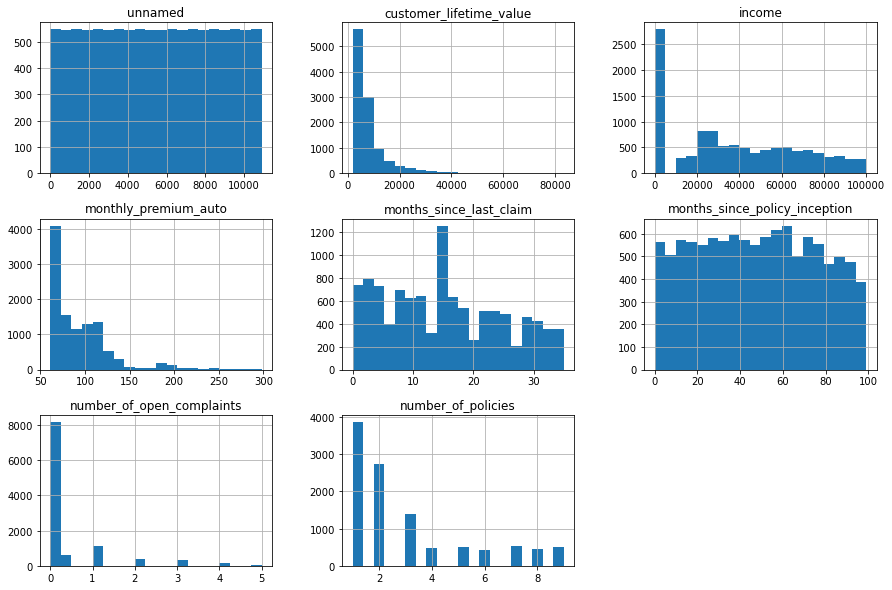

In [22]:
x_num.hist(bins=20, figsize = (15,10));

In [23]:
x_cat = df.select_dtypes(include = object)

In [24]:
x_cat.head()

customer       state response  coverage education employmentstatus gender  \
0  DK49336     Arizona       No     Basic   College         Employed      M   
1  KX64629  California       No     Basic   College       Unemployed      F   
2  LZ68649  Washington       No     Basic  Bachelor         Employed      M   
3  XL78013      Oregon      Yes  Extended   College         Employed      M   
4  QA50777      Oregon       No   Premium  Bachelor    Medical Leave      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer3   
1      Suburban         Single   Personal Auto   Personal L3           Offer4   
2      Suburban         Single   Personal Auto   Personal L3           Offer3   
3      Suburban         Single  Corporate Auto  Corporate L3           Offer2   
4      Suburban        Married   Personal Auto   Personal L2           Offer1   

  sales_channel  vehicle_class vehicle_size vehicle_type month_number  
0         Agent  Four-Door Car      Medsize       Unkown            2  
1   Call Center  Four-Door Car      Medsize       Unkown            1  
2   Call Center            SUV      Medsize            A            2  
3        Branch  Four-Door Car      Medsize            A            1  
4        Branch  Four-Door Car      Medsize       Unkown            1

#### We can drop the "unnamed" and the "customer" columns, as they seems irrelevant for our purpose. Also, after running several tests,  I found that dropping  the "customer_lifetime_value" column increase significantly the model accuracy.

In [25]:
x_num = x_num.drop(["unnamed", "customer_lifetime_value"], axis = 1)
x_cat = x_cat.drop(["customer"], axis = 1)

In [26]:
correlations_matrix = x_num.corr()
correlations_matrix

income  monthly_premium_auto  \
income                         1.000000             -0.009788   
monthly_premium_auto          -0.009788              1.000000   
months_since_last_claim       -0.023126              0.008504   
months_since_policy_inception -0.005903              0.018953   
number_of_open_complaints      0.006973             -0.010066   
number_of_policies            -0.009960             -0.020505   

                               months_since_last_claim  \
income                                       -0.023126   
monthly_premium_auto                          0.008504   
months_since_last_claim                       1.000000   
months_since_policy_inception                -0.038155   
number_of_open_complaints                     0.002246   
number_of_policies                            0.007425   

                               months_since_policy_inception  \
income                                             -0.005903   
monthly_premium_auto                                0.018953   
months_since_last_claim                            -0.038155   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.004246   
number_of_policies                                 -0.009123   

                               number_of_open_complaints  number_of_policies  
income                                          0.006973           -0.009960  
monthly_premium_auto                           -0.010066           -0.020505  
months_since_last_claim                         0.002246            0.007425  
months_since_policy_inception                   0.004246           -0.009123  
number_of_open_complaints                       1.000000            0.003938  
number_of_policies                              0.003938            1.000000

#### As we can see there's no variables that are highly correlated (over 0.9) , so we can't drop any column basing ourselves on that parameter.

In [27]:
x_num.head()

income  monthly_premium_auto  months_since_last_claim  \
0   48029                    61                     7.00   
1       0                    64                     3.00   
2   22139                   100                    34.00   
3   49078                    97                    10.00   
4   23675                   117                    15.15   

   months_since_policy_inception  number_of_open_complaints  \
0                             52                       0.00   
1                             26                       0.00   
2                             31                       0.00   
3                              3                       0.00   
4                             31                       0.38   

   number_of_policies  
0                   9  
1                   1  
2                   2  
3                   2  
4                   7

In [28]:
x_cat.head()

state response  coverage education employmentstatus gender  \
0     Arizona       No     Basic   College         Employed      M   
1  California       No     Basic   College       Unemployed      F   
2  Washington       No     Basic  Bachelor         Employed      M   
3      Oregon      Yes  Extended   College         Employed      M   
4      Oregon       No   Premium  Bachelor    Medical Leave      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer3   
1      Suburban         Single   Personal Auto   Personal L3           Offer4   
2      Suburban         Single   Personal Auto   Personal L3           Offer3   
3      Suburban         Single  Corporate Auto  Corporate L3           Offer2   
4      Suburban        Married   Personal Auto   Personal L2           Offer1   

  sales_channel  vehicle_class vehicle_size vehicle_type month_number  
0         Agent  Four-Door Car      Medsize       Unkown            2  
1   Call Center  Four-Door Car      Medsize       Unkown            1  
2   Call Center            SUV      Medsize            A            2  
3        Branch  Four-Door Car      Medsize            A            1  
4        Branch  Four-Door Car      Medsize       Unkown            1

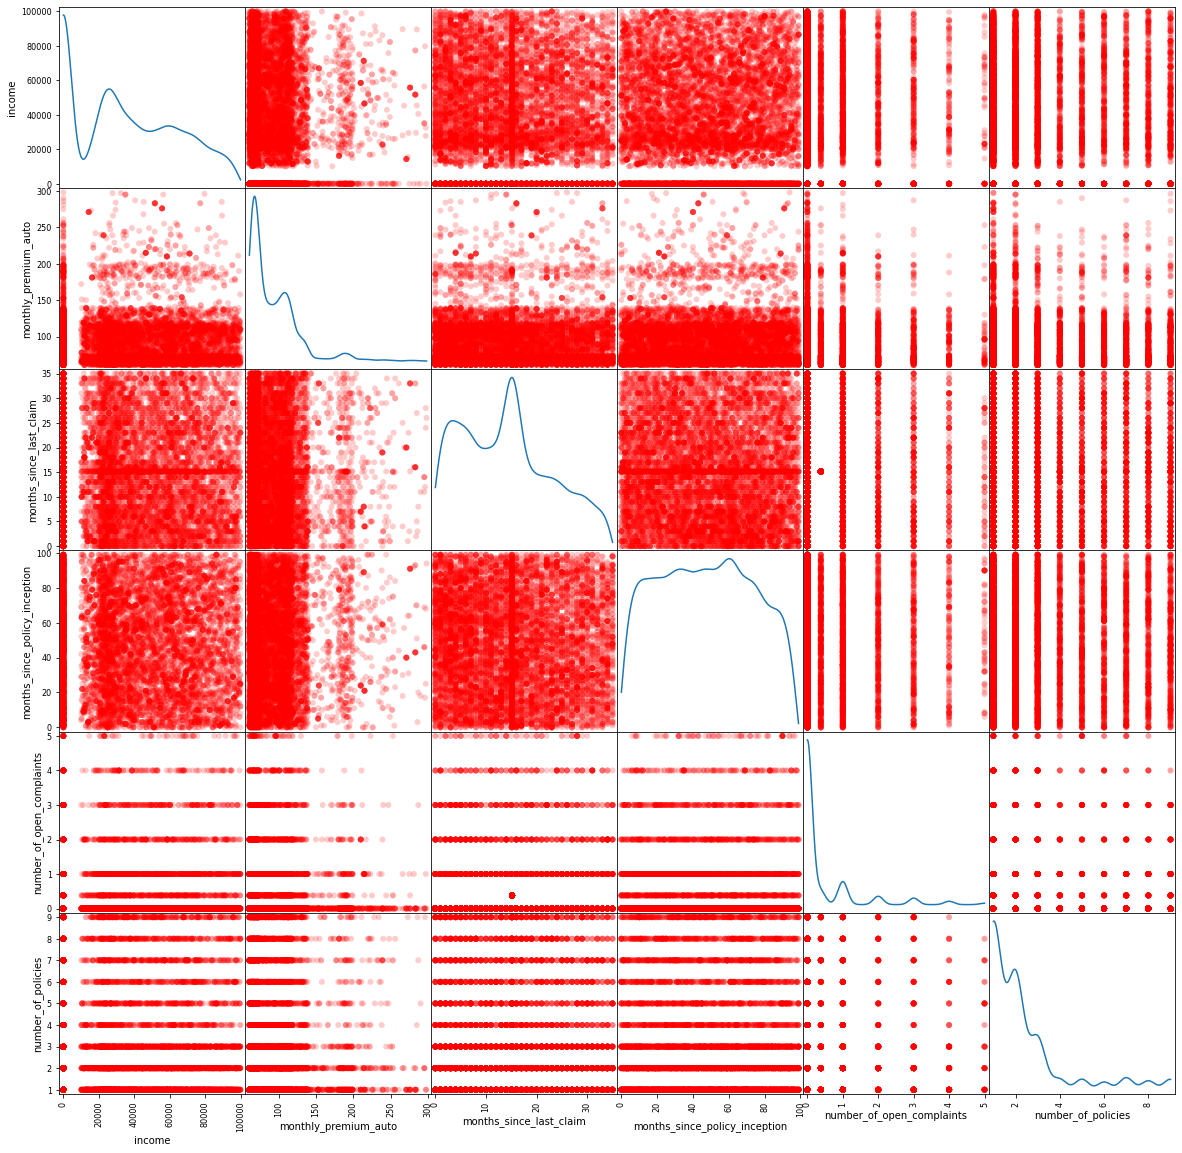

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_num, alpha=0.2, figsize = (20,20), marker = "o",color = "red", diagonal = "kde");

In [30]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)

In [31]:
x_normalized

array([[9.99998579e-01, 1.27006420e-03, 1.45745072e-04, 1.08267768e-03,
        0.00000000e+00, 1.87386521e-04],
       [0.00000000e+00, 9.25497368e-01, 4.33826891e-02, 3.75983306e-01,
        0.00000000e+00, 1.44608964e-02],
       [9.99987635e-01, 4.51686000e-03, 1.53573240e-03, 1.40022660e-03,
        0.00000000e+00, 9.03372000e-05],
       ...,
       [9.99985982e-01, 5.04548993e-03, 2.76121339e-04, 1.58142222e-03,
        0.00000000e+00, 5.02038799e-05],
       [9.99996876e-01, 2.46124319e-03, 0.00000000e+00, 4.20592190e-04,
        6.23099541e-05, 9.34649312e-05],
       [0.00000000e+00, 9.55555486e-01, 2.93289308e-01, 9.46094541e-03,
        0.00000000e+00, 2.83828362e-02]])

In [32]:
x_num.columns

Index(['income', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [33]:
x_norm = pd.DataFrame(x_normalized, columns = ['income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'])

In [34]:
x_norm.head()

income  monthly_premium_auto  months_since_last_claim  \
0  0.999999              0.001270                 0.000146   
1  0.000000              0.925497                 0.043383   
2  0.999988              0.004517                 0.001536   
3  0.999998              0.001976                 0.000204   
4  0.999987              0.004942                 0.000640   

   months_since_policy_inception  number_of_open_complaints  \
0                       0.001083                   0.000000   
1                       0.375983                   0.000000   
2                       0.001400                   0.000000   
3                       0.000061                   0.000000   
4                       0.001309                   0.000016   

   number_of_policies  
0            0.000187  
1            0.014461  
2            0.000090  
3            0.000041  
4            0.000296

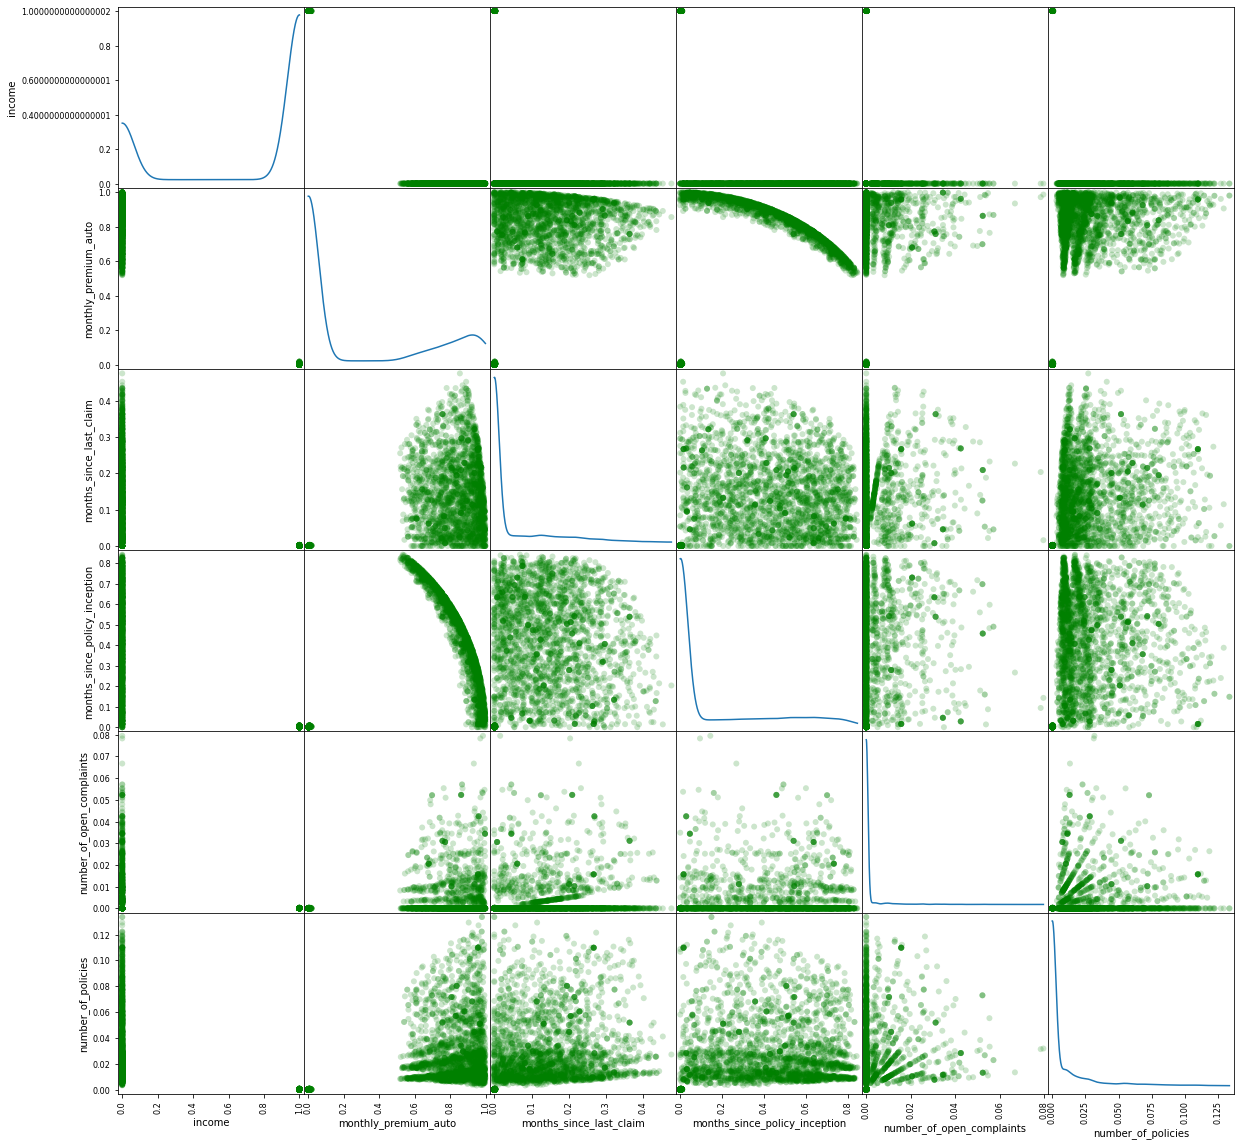

In [35]:
scatter_matrix(x_norm, alpha=0.2, figsize = (20,20), marker = "o",color = "green", diagonal = "kde");

#### We can see that the normalized function doesn't help us too much.

In [36]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_standardised = transformer.transform(x_num)

In [37]:
x_standardised

array([[ 0.34563485, -0.93481904, -0.83298222,  0.13987654, -0.43363981,
         2.50945468],
       [-1.23646244, -0.84771343, -1.24185176, -0.79070911, -0.43363981,
        -0.82492205],
       [-0.50719362,  0.19755381,  1.92688719, -0.61175033, -0.43363981,
        -0.40812496],
       ...,
       [ 0.07578661,  3.13010912, -0.42411267,  0.53358586, -0.43363981,
        -0.40812496],
       [ 0.87815031,  1.88159547, -1.54850391, -0.75491735,  4.08333377,
         1.25906341],
       [-1.23646244,  0.22658901,  1.62023503, -1.685503  , -0.43363981,
         0.00867213]])

In [38]:
x_std = pd.DataFrame(x_standardised, columns = ['income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'])

In [39]:
x_std.head()

income  monthly_premium_auto  months_since_last_claim  \
0  0.345635             -0.934819                -0.832982   
1 -1.236462             -0.847713                -1.241852   
2 -0.507194              0.197554                 1.926887   
3  0.380189              0.110448                -0.526330   
4 -0.456597              0.691152                 0.000089   

   months_since_policy_inception  number_of_open_complaints  \
0                       0.139877                  -0.433640   
1                      -0.790709                  -0.433640   
2                      -0.611750                  -0.433640   
3                      -1.613919                  -0.433640   
4                      -0.611750                  -0.004527   

   number_of_policies  
0            2.509455  
1           -0.824922  
2           -0.408125  
3           -0.408125  
4            1.675860

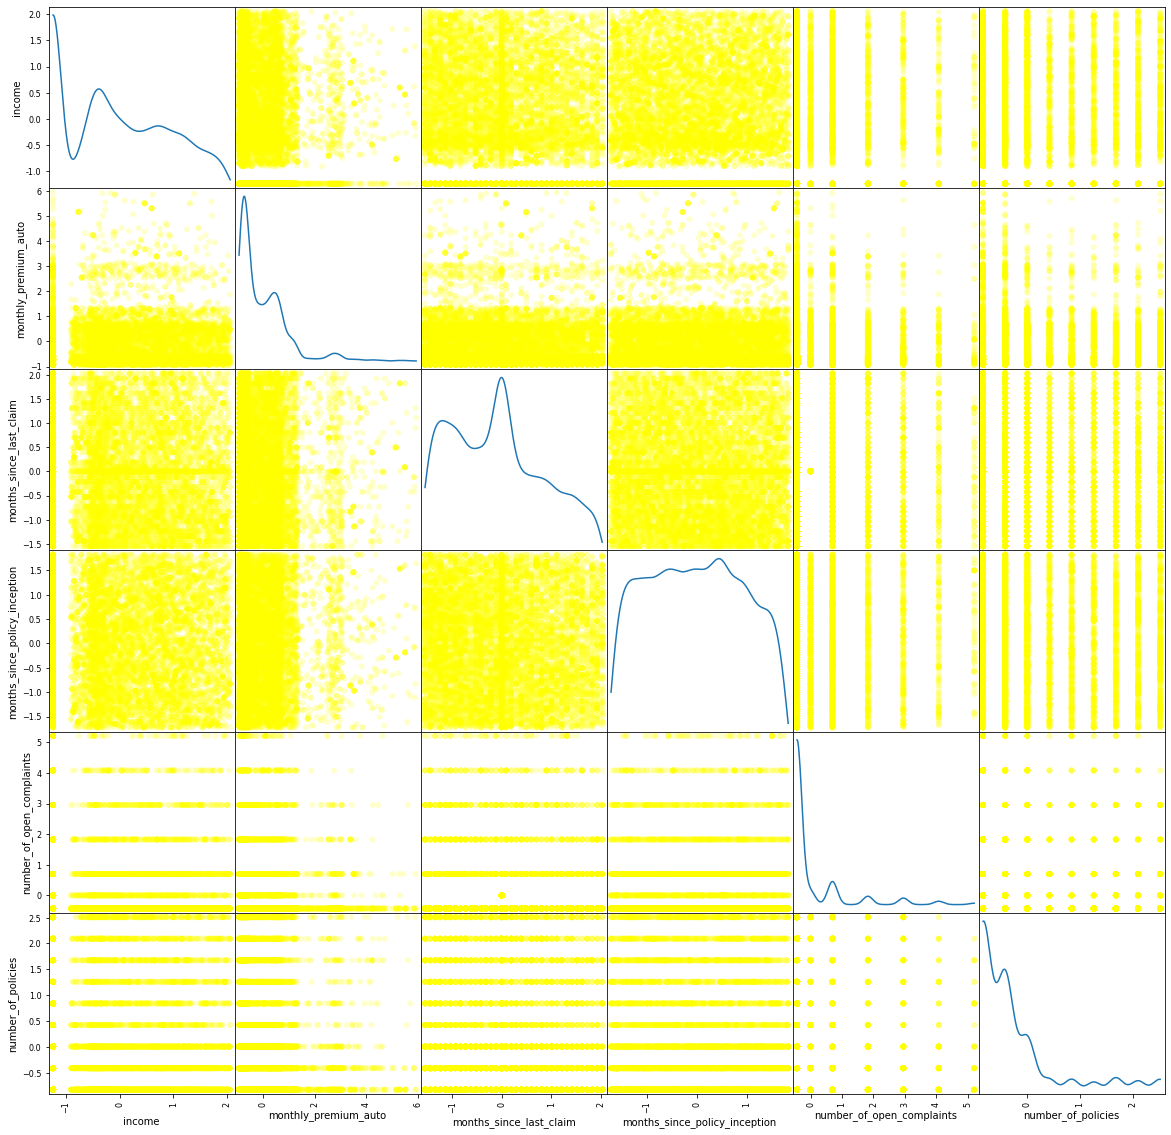

In [40]:
scatter_matrix(x_std, alpha=0.2, figsize = (20,20), marker = "o",color = "yellow", diagonal = "kde");

In [41]:
import time
from datetime import date

In [42]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors = "coerce")

In [43]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(df[["effective_to_date"]])
x_MinMax = transformer.transform(df[["effective_to_date"]])

In [44]:
date_maxmin = pd.DataFrame(x_MinMax, columns = ["effective_to_date"])

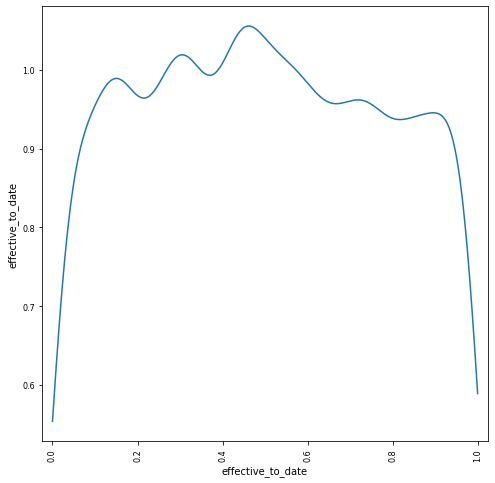

In [45]:
scatter_matrix(date_maxmin, alpha=0.2, figsize = (8,8), diagonal = "kde");

In [46]:
x_date = date_maxmin

In [47]:
x_date.reset_index()

index  effective_to_date
0          0           0.827586
1          1           0.293103
2          2           0.689655
3          3           0.172414
4          4           0.275862
...      ...                ...
10905  10905           0.310345
10906  10906           0.086207
10907  10907           0.620690
10908  10908           0.741379
10909  10909           0.120690

[10910 rows x 2 columns]

In [48]:
x_cat.reset_index()

index       state response  coverage education employmentstatus gender  \
0          0     Arizona       No     Basic   College         Employed      M   
1          1  California       No     Basic   College       Unemployed      F   
2          2  Washington       No     Basic  Bachelor         Employed      M   
3          3      Oregon      Yes  Extended   College         Employed      M   
4          4      Oregon       No   Premium  Bachelor    Medical Leave      F   
...      ...         ...      ...       ...       ...              ...    ...   
10905  10905      Nevada       No   Premium  Bachelor       Unemployed      F   
10906  10906      Oregon       No     Basic   College         Employed      F   
10907  10907     Arizona       No  Extended  Bachelor         Employed      F   
10908  10908  California       No   Premium   College         Employed      F   
10909  10909      Unkown   Unkown     Basic  Bachelor       Unemployed      M   

      location_code marital_status     policy_type        policy  \
0          Suburban        Married  Corporate Auto  Corporate L3   
1          Suburban         Single   Personal Auto   Personal L3   
2          Suburban         Single   Personal Auto   Personal L3   
3          Suburban         Single  Corporate Auto  Corporate L3   
4          Suburban        Married   Personal Auto   Personal L2   
...             ...            ...             ...           ...   
10905      Suburban        Married   Personal Auto   Personal L1   
10906         Urban        Married   Personal Auto   Personal L3   
10907         Rural        Married  Corporate Auto  Corporate L3   
10908         Urban       Divorced   Personal Auto   Personal L1   
10909      Suburban         Single   Personal Auto   Personal L1   

      renew_offer_type sales_channel  vehicle_class vehicle_size vehicle_type  \
0               Offer3         Agent  Four-Door Car      Medsize       Unkown   
1               Offer4   Call Center  Four-Door Car      Medsize       Unkown   
2               Offer3   Call Center            SUV      Medsize            A   
3               Offer2        Branch  Four-Door Car      Medsize            A   
4               Offer1        Branch  Four-Door Car      Medsize       Unkown   
...                ...           ...            ...          ...          ...   
10905           Offer3           Web     Luxury Car      Medsize            A   
10906           Offer2        Branch  Four-Door Car      Medsize            A   
10907           Offer1           Web     Luxury SUV      Medsize       Unkown   
10908           Offer1        Branch            SUV      Medsize            A   
10909           Offer4           Web            SUV      Medsize       Unkown   

      month_number  
0                2  
1                1  
2                2  
3                1  
4                1  
...            ...  
10905            1  
10906            1  
10907            2  
10908            2  
10909            1  

[10910 rows x 17 columns]

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [50]:
x_cat = encoded

In [51]:
newdata=np.concatenate([x_std, x_cat,x_date],axis=1)
newdata

array([[ 0.34563485, -0.93481904, -0.83298222, ...,  1.        ,
         1.        ,  0.82758621],
       [-1.23646244, -0.84771343, -1.24185176, ...,  1.        ,
         0.        ,  0.29310345],
       [-0.50719362,  0.19755381,  1.92688719, ...,  0.        ,
         1.        ,  0.68965517],
       ...,
       [ 0.07578661,  3.13010912, -0.42411267, ...,  1.        ,
         1.        ,  0.62068966],
       [ 0.87815031,  1.88159547, -1.54850391, ...,  0.        ,
         1.        ,  0.74137931],
       [-1.23646244,  0.22658901,  1.62023503, ...,  1.        ,
         0.        ,  0.12068966]])

In [52]:
newdata.shape

(10910, 56)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(newdata, y, test_size=0.05, random_state=15)

In [54]:
x_train.shape

(10364, 56)

In [55]:
x_test.shape

(546, 56)

In [56]:
y_train.shape

(10364,)

In [57]:
y_test.shape

(546,)

In [58]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
lm = linear_model.LinearRegression()

In [60]:
model = lm.fit(x_train, y_train)

In [61]:
predictions = lm.predict(x_test)

In [62]:
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))

0.7906886406852945
17303.83610211076


### I've obtained an r2 score of aproximatly 80%, while the mean squared error is of 17303,84.